<a href="https://colab.research.google.com/github/merucode/RL/blob/91-Proejct-Trader-Custom_ENV/11_develop_base_env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup ENV and Test

In [3]:
!git clone -b 31-Study-Udemy-Custom_ENV_snake_game https://github.com/merucode/RL.git
!cd RL && mv * ../

fatal: destination path 'RL' already exists and is not an empty directory.
mv: cannot stat '*': No such file or directory
Obtaining file:///content/snake
  Preparing metadata (setup.py) ... done
  Attempting uninstall: gymsnake
    Found existing installation: gymsnake 0.0.1
    Uninstalling gymsnake-0.0.1:
      Successfully uninstalled gymsnake-0.0.1
  Running setup.py develop for gymsnake


In [6]:
!pip install -e snake

Obtaining file:///content/snake
  Preparing metadata (setup.py) ... done
  Attempting uninstall: gymsnake
    Found existing installation: gymsnake 0.0.1
    Uninstalling gymsnake-0.0.1:
      Successfully uninstalled gymsnake-0.0.1
  Running setup.py develop for gymsnake


In [1]:
import time
import matplotlib.pyplot as plt
import gym

In [4]:
env = gym.make("snake:snake-v0", df=df, obs_len=30)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:20: UserWarning: WARN: It seems a Box observation space is an image but the `dtype` is not `np.uint8`, actual type: float32. If the Box observation space is not an image, we recommend flattening the observation to have only a 1D vector.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
img = env.reset()
# plt.figure()
# plt.imshow(img)
print(img.shape)

(1600, 900, 3)


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: uint8
  logger.warn(
/usr/l

0 False {'score': 0}


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:280: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actu

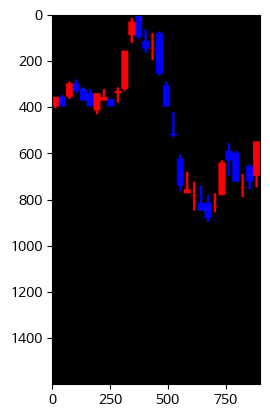

In [6]:
env.reset()
env.render(mode="human")
action = env.action_space.sample()
img, reward, done, info = env.step(1)
print(reward, done, info)
plt.figure()
plt.imshow(img)

In [8]:
df[:30]

,open,high,low,close,volume
0,78500,79000,78400,79000,12456646
1,79000,79100,78500,78500,12355296
2,79000,79800,78900,79700,12618790
3,79700,79900,79200,79300,9098910
4,79400,79500,78800,78800,10040975
5,79200,79400,78500,78500,11427693
6,78300,79200,78100,79200,12743417
7,78800,79400,78800,79000,14360453
8,78900,78900,78500,78500,13823411
9,79200,79500,78700,79300,11739124


# STEP. Ready Data

In [3]:
!pip install pykrx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 11.8 MB/s eta 0:00:00


In [2]:
### DATA
from pykrx import stock
import pandas as pd

df = stock.get_market_ohlcv("20210720", "20221010", "005930")
df = df[df.columns.tolist()[:-1]]
df.columns = ['open', 'high', 'low', 'close', 'volume']

df = df.reset_index(drop=True)
print(df.head(3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    open   high    low  close    volume
0  78500  79000  78400  79000  12456646
1  79000  79100  78500  78500  12355296
2  79000  79800  78900  79700  12618790


In [ ]:
### init
time_step = 0
list_df = []

for i in range(7):
    list_df.append(df.iloc[i].tolist())

print(list_df[0])

[78500, 79000, 78400, 79000, 12456646]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def loop_obs_df(list_df, time_step):
    list_df.pop(0)
    list_df.append(df.iloc[time_step + 7].tolist())
    time_step += 1
    return list_df, time_step

In [ ]:
list_df, time_step = loop_obs_df(list_df, time_step)
print(list_df)

[[79000, 79100, 78500, 78500, 12355296], [79000, 79800, 78900, 79700, 12618790], [79700, 79900, 79200, 79300, 9098910], [79400, 79500, 78800, 78800, 10040975], [79200, 79400, 78500, 78500, 11427693], [78300, 79200, 78100, 79200, 12743417]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(list_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7

In [ ]:
print(list_df)
list_df.pop(0)
print(list_df)

In [12]:
df_v = df[df.columns[-1:]]
df = df[df.columns[:4]]
df_v.head(3)

,volume
0,12456646
1,12355296
2,12618790


In [19]:
### init
time_step = 0
list_df = []
list_v_df = []

for i in range(7):
    list_df.append(df.iloc[i].tolist())
    list_v_df.append(df_v.iloc[i].tolist())

print(list_df[0])
print(list_v_df[0])

[78500, 79000, 78400, 79000]
[12456646]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
for idx in range(len(list_df)):
    list_df[idx].append(list_v_df[idx][0])

print(list_df[0])

[78500, 79000, 78400, 79000, 12456646]


In [32]:
list_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[78500, 79000, 78400, 79000],
 [79000, 79100, 78500, 78500],
 [79000, 79800, 78900, 79700],
 [79700, 79900, 79200, 79300],
 [79400, 79500, 78800, 78800],
 [79200, 79400, 78500, 78500],
 [78300, 79200, 78100, 79200]]

In [29]:
max(map(max, list_df)), min(map(min, list_df))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(79900, 78100)

In [21]:
def _max_min_scale_rounded(value, old_min, old_max, new_range=1):
    scaled_value = (value - old_min) / (old_max - old_min) * new_range
    scaled_value = round(scaled_value)
    return scaled_value

In [22]:
def _scale_lst(lst, new_range):
    old_min = min(map(min, lst))  # min from 2-dimension list
    old_max = max(map(max, lst))  # max from 2-dimension list

    new_lst = []
    new_sub_lst = []

    for sub_lst in lst:
        new_sub_lst = []
        for value in sub_lst:
            scaled_value = _max_min_scale_rounded(value, old_min, old_max, new_range=new_range)
            new_sub_lst.append(scaled_value)
        new_lst.append(new_sub_lst)

    return new_lst

In [23]:
new_lst = _scale_lst(list_v_df, 1000)

In [24]:
new_lst

[[921], [894], [966], [0], [258], [639], [1000]]

In [25]:
list_v_df

[[12456646],
 [12355296],
 [12618790],
 [9098910],
 [10040975],
 [11427693],
 [12743417]]

# STEP. ENV Code Test

In [ ]:
import time

import numpy as np

import gym
from gym import error, spaces, utils
from gym.utils import seeding

import pygame, sys, time, random
from pygame.surfarray import array3d
from pygame import display

In [ ]:
BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

In [64]:
class SnakeEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, obs_len=30):
        self.df = df
        self.obs_len=obs_len

        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(4) # Not use observation space(Handling Error) # We observate images
        self.frame_size_x = 900
        self.frame_size_y = 1500
        self.frame_size_candle_y = 900
        self.frame_size_volume_y = 500
        self.frame_size_score = 100
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))
        self.reset()
        self.STEP_LIMIT = 1000
        self.sleep = 0

        self.candle_width = self.frame_size_x // self.obs_len

    def get_obs_df_init(self):
        list_df = []

        for i in range(self.obs_len):
            list_df.append(self.df.iloc[i].tolist())

        return list_df


    def reset(self):
        self.game_window.fill(BLACK)
        self.snake_pos = [100, 50]
        self.snake_body = [[100, 50], [100-10, 50], [100-(2*10), 50]]
        #self.food_pos = self.spawn_food()
        self.food_spawn = True

        self.direction = "RIGHT"
        self.change_to = self.direction
        self.score = 0
        self.steps = 0

        img = array3d(display.get_surface())
        img = np.swapaxes(img, 0, 1)

        ###
        self.list_df = self.get_obs_df_init()


        return img

In [10]:
env = SnakeEnv(df=df,obs_len=30)

# snake_env.py

In [9]:
import time

import numpy as np

import gym
from gym import error, spaces, utils
from gym.utils import seeding

import pygame, sys, time, random
from pygame.surfarray import array3d
from pygame import display

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

"""
df : pd.DataFrame whcich consist of columns(open, high, low, close, volume)
obs_len : What you want observate lenth from df

action_space : 3


obs_lst : list of df(obs lenth)
get_obs_lst_init : initiate obs_lst
"""
class SnakeEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, obs_len=30):
        self.df_ohlc = df[df.columns[:4]]
        self.df_v = df[df.columns[-1:]]
        self.obs_len = obs_len  ###

        self.frame_size_x = 900
        self.frame_size_y = 1600
        self.frame_size_candle_y = 900
        self.frame_size_volume_y = 500
        self.frame_size_scorey = 100
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=255, shape=(self.frame_size_x, self.frame_size_y, 3))

        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))
        self.reset()
        self.STEP_LIMIT = 1000
        self.sleep = 0


    def step(self, action):
        scoreholder = self.score
        reward = 0
        self.direction = SnakeEnv.change_direction(action, self.direction)
        self.snake_pos = SnakeEnv.move(self.direction, self.snake_pos)
        self.snake_body.insert(0, list(self.snake_pos))

        reward = self.food_handler()

        self.update_game_state()

        reward, done = self.game_over(reward)

        img = self._get_image()
        info = {"score": self.score}
        self.steps += 1
        time.sleep(self.sleep)
        return img, reward, done, info


    @staticmethod
    def change_direction(action, direction):
        if action == 0 and direction != "DOWN":
            direction = 'UP'
        if action==1 and direction != "UP":
            direction = 'DOWN'
        if action==2 and direction != "RIGHT":
            direction = 'LEFT'
        if action==3 and direction != "LEFT":
            direction = 'RIGHT'
        return direction

    @staticmethod
    def move(direction, snake_pos):
        if direction == 'UP':
            snake_pos[1] -= 10
        if direction == 'DOWN':
            snake_pos[1] += 10
        if direction == 'LEFT':
            snake_pos[0] -= 10
        if direction == 'RIGHT':
            snake_pos[0] += 10
        return snake_pos


    def eat(self):
        return self.snake_pos[0] == self.food_pos[0] and self.snake_pos[1] == self.food_pos[1]

    def spawn_food(self):
        return [random.randrange(1, (self.frame_size_x//10)) * 10, random.randrange(1, (self.frame_size_y//10)) * 10]

    def food_handler(self):
        if self.eat():
            self.score += 1
            reward = 1
            self.food_spawn = False
        else:
            self.snake_body.pop()
            reward = 0

        if not self.food_spawn:
            self.food_pos = self.spawn_food()
        self.food_spawn = True

        return reward


    ###
    def update_game_state(self):
        self.game_window.fill(BLACK)
        #for pos in self.snake_body:
        #    pygame.draw.rect(self.game_window, GREEN, pygame.Rect(pos[0], pos[1], 10, 10))

        #pygame.draw.rect(self.game_window, WHITE, pygame.Rect(self.food_pos[0], self.food_pos[1], 10, 10))

        ###

        candle_width = self.frame_size_x // self.obs_len
        candle_line_space = 10
        candle_line_width = 10
        for idx in range(len(self.obs_scaled_lst)):
            candle_x = idx * candle_width
            candle_y = self.frame_size_candle_y - max(self.obs_scaled_lst[idx][0], self.obs_scaled_lst[idx][3])
            candle_height = abs(self.obs_scaled_lst[idx][0] - self.obs_scaled_lst[idx][3])

            candle_line_y = self.frame_size_candle_y - self.obs_scaled_lst[idx][1]
            candle_line_height = self.obs_scaled_lst[idx][1] - self.obs_scaled_lst[idx][2]

            if self.obs_scaled_lst[idx][0] == self.obs_scaled_lst[idx][3]:
                candle_height = 2
                pygame.draw.rect(self.game_window, RED,
                                 pygame.Rect(candle_x , candle_y, candle_width, candle_height)) # candle
                pygame.draw.rect(self.game_window, RED,
                                 pygame.Rect(candle_x  + candle_line_space, candle_line_y, candle_line_width, candle_line_height)) # candle line
            elif self.obs_scaled_lst[idx][0] < self.obs_scaled_lst[idx][3]:
                pygame.draw.rect(self.game_window, RED,
                                 pygame.Rect(candle_x , candle_y, candle_width, candle_height))
                pygame.draw.rect(self.game_window, RED,
                                 pygame.Rect(candle_x  + candle_line_space, candle_line_y, candle_line_width, candle_line_height)) # candle
            else:
                pygame.draw.rect(self.game_window, BLUE,
                                 pygame.Rect(candle_x , candle_y, candle_width, candle_height))
                pygame.draw.rect(self.game_window, BLUE,
                                 pygame.Rect(candle_x  + candle_line_space, candle_line_y, candle_line_width, candle_line_height)) # candle


    # def get_image_array_from_game(self):
    #     img = array3d(display.get_surface())
    #     img = np.swapaxes(img, 0, 1)
    #     return img

    def game_over(self, reward):
        if self.snake_pos[0] < 0 or self.snake_pos[0] > self.frame_size_x-10:
            return -1, True
        if self.snake_pos[1] < 0 or self.snake_pos[1] > self.frame_size_y-10:
            return -1, True

        for block in self.snake_body[1:]:
            if self.snake_pos[0] == block[0] and self.snake_pos[1] == block[1]:
                return -1, True
        if self.steps >= 1000:
            return 0, True

        return reward, False


    ###
    def _get_obs_lst_init(self):
        obs_ohlc_lst = []
        obs_v_lst = []

        for i in range(self.obs_len):
            obs_ohlc_lst.append(self.df_ohlc.iloc[i].tolist())
            obs_v_lst.append(self.df_v.iloc[i].tolist())

        return obs_ohlc_lst, obs_v_lst

    ###
    def _get_image(self):
        img = array3d(display.get_surface())
        img = np.swapaxes(img, 0, 1)
        return img


    ###
    def _max_min_scale_round(self, value, old_min, old_max, new_range=1):
        scaled_value = (value - old_min) / (old_max - old_min) * new_range
        scaled_value = round(scaled_value)
        return scaled_value

    ###
    def _scale_lst(self, lst, new_range):
        old_min = min(map(min, lst))  # min from 2-dimension list
        old_max = max(map(max, lst))  # max from 2-dimension list

        new_lst = []
        new_sub_lst = []

        for sub_lst in lst:
            new_sub_lst = []
            for value in sub_lst:
                scaled_value = self._max_min_scale_round(value, old_min, old_max, new_range=new_range)
                new_sub_lst.append(scaled_value)
            new_lst.append(new_sub_lst)

        return new_lst


    def reset(self):
        self.game_window.fill(BLACK)
        self.snake_pos = [100, 50]
        self.snake_body = [[100, 50], [100-10, 50], [100-(2*10), 50]]
        self.food_pos = self.spawn_food()
        self.food_spawn = True

        self.direction = "RIGHT"
        self.change_to = self.direction
        self.score = 0
        self.steps = 0

        # img = array3d(display.get_surface())
        # img = np.swapaxes(img, 0, 1)

        ###
        self.obs_ohlc_lst, self.obs_v_lst = self._get_obs_lst_init()

        self.obs_scaled_lst = self._scale_lst(self.obs_ohlc_lst, self.frame_size_candle_y)
        self.obs_scaled_v_lst = self._scale_lst(self.obs_v_lst, self.frame_size_volume_y)

        for idx in range(len(self.obs_scaled_lst)):
            self.obs_scaled_lst[idx].append(self.obs_scaled_v_lst[idx][0])

        obs = self._get_image()

        return obs


    def render(self, mode='human'):
        if mode == "human":
            display.update()

    def close(self):
        pass

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
